## 4.1 배깅에서 부스팅까지

### 4.1.1  에이다부스트 소개 

### 4.1.2 그레이디언트 부스팅의 특징

## 4.2 그레이디언트 부스팅 작동 방식

### 4.2.1  잔차 

### 4.2.2 그레이디언트 부스팅 모델 구축 방법 배우기

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
xgb.set_config(verbosity=0)

In [3]:
df_bikes = pd.read_csv('data/bike_rentals_cleaned.csv')

In [5]:
df_bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600


In [6]:
X_bikes = df_bikes.iloc[:,:-1]
y_bikes = df_bikes.iloc[:,-1]

In [7]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_bikes, y_bikes, random_state=2)

### 4.2.3 그레디언트 부스팅 모델 만들기

In [9]:
from sklearn.tree import DecisionTreeRegressor
tree_1 = DecisionTreeRegressor(max_depth=2, random_state=2)
tree_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=2)

In [11]:
y_train_pred = tree_1.predict(X_train)

In [12]:
y2_train = y_train - y_train_pred

In [20]:
tree_2 = DecisionTreeRegressor(max_depth=2, random_state=2)
tree_2.fit(X_train, y2_train)

DecisionTreeRegressor(max_depth=2, random_state=2)

In [22]:
y2_train_pred = tree_2.predict(X_train)
y3_train = y2_train - y2_train_pred
tree_3 = DecisionTreeRegressor(max_depth=2, random_state=2)
tree_3.fit(X_train, y3_train)

DecisionTreeRegressor(max_depth=2, random_state=2)

In [23]:
y1_pred = tree_1.predict(X_test)
y2_pred = tree_2.predict(X_test)
y3_pred = tree_3.predict(X_test)

In [24]:
y_pred = y1_pred + y2_pred + y3_pred

In [28]:
from sklearn.metrics import mean_squared_error as MSE
MSE(y_test, y_pred)**0.5

np.float64(911.0479538776444)

### 4.2.4 사이킷런으로 그레이디언트 부스팅 모델 만들기

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

In [30]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=3, random_state=2, learning_rate=1.0)

In [32]:
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
MSE(y_test, y_pred)**0.5

np.float64(911.0479538776439)

In [33]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=30, random_state=2, learning_rate=1.0)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
MSE(y_test, y_pred)**0.5

np.float64(857.1072323426944)

In [34]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=300, random_state=2, learning_rate=1.0)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
MSE(y_test, y_pred)**0.5

np.float64(936.3617413678853)

In [35]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=300, random_state=2)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
MSE(y_test, y_pred)**0.5

np.float64(653.7456840231495)

## 4.3 그레이디언트 부스팅 매개변수 튜닝 

### 4.3.1 learning_rate

In [37]:
learning_rate_values = [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 1.0]

In [38]:
for value in learning_rate_values:
    gbr = GradientBoostingRegressor(max_depth=2, n_estimators=300, random_state=2, learning_rate=value)
    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_test)
    rmse = MSE(y_test, y_pred)**0.5
    print('학습률:', value, ', 점수:', rmse)

학습률: 0.001 , 점수: 1633.0261400367253
학습률: 0.01 , 점수: 831.5430182728547
학습률: 0.05 , 점수: 685.0192988749716
학습률: 0.1 , 점수: 653.7456840231495
학습률: 0.15 , 점수: 687.666134269379
학습률: 0.2 , 점수: 664.312804425697
학습률: 0.3 , 점수: 689.4190385930236
학습률: 0.5 , 점수: 693.8856905068778
학습률: 1.0 , 점수: 936.3617413678853


### 4.3.2 기본 학습기

In [40]:
depths = [None, 1, 2, 3, 4]
for depth in depths:
    gbr = GradientBoostingRegressor(max_depth=depth, n_estimators=300, random_state=2, learning_rate=value)
    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_test)
    rmse = MSE(y_test, y_pred)**0.5
    print('최대 깊이:', depth, ', 점수:', rmse)

최대 깊이: None , 점수: 928.1751265649012
최대 깊이: 1 , 점수: 710.6951838861916
최대 깊이: 2 , 점수: 936.3617413678853
최대 깊이: 3 , 점수: 830.1889193367603
최대 깊이: 4 , 점수: 862.0987126704499


### 4.3.3 subsample

In [45]:
import matplotlib.pyplot as plt

In [42]:
samples = [1, 0.9, 0.8, 0.7, 0.6, 0.5]
for sample in samples:
    gbr = GradientBoostingRegressor(max_depth=3, n_estimators=300, subsample=sample, random_state=2)
    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_test)
    rmse = MSE(y_test, y_pred)**0.5
    print('subsample:', sample, ', 점수:', rmse)

subsample: 1 , 점수: 646.4045923317708
subsample: 0.9 , 점수: 620.1819001443569
subsample: 0.8 , 점수: 617.2355650565677
subsample: 0.7 , 점수: 608.5878109774266
subsample: 0.6 , 점수: 636.998132650159
subsample: 0.5 , 점수: 626.9974073227554


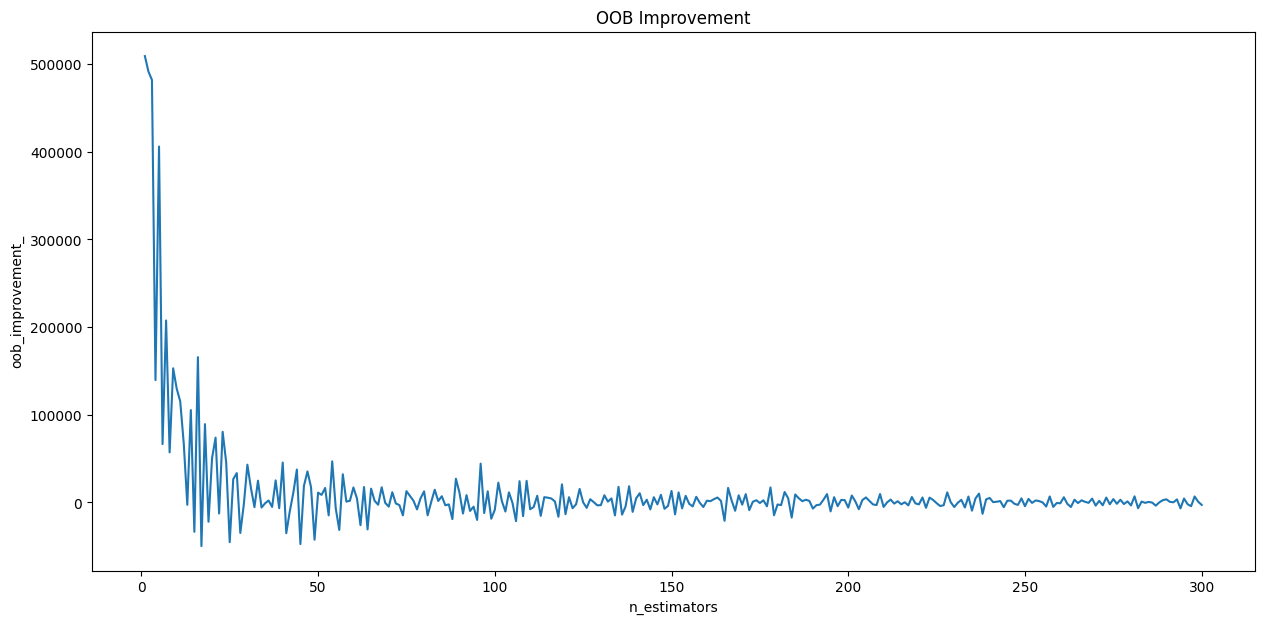

In [47]:
plt.figure(figsize=(15, 7))
plt.plot(range(1, 301), gbr.oob_improvement_)
plt.xlabel('n_estimators')
plt.ylabel('oob_improvement_')
plt.title('OOB Improvement')
plt.show()

### 4.3.4 RandomizedSearchCV

In [49]:
params = {'subsample': [0.65, 0.7, 0.75], 
          'n_estimators': [300, 500, 1000],
          'learning_rate': [0.05, 0.075, 0.1]}

In [50]:
from sklearn.model_selection import RandomizedSearchCV
gbr = GradientBoostingRegressor(max_depth=3, random_state=2)

In [52]:
rand_reg = RandomizedSearchCV(gbr, params, n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=2)

In [53]:
rand_reg.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=2),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.075, 0.1],
                                        'n_estimators': [300, 500, 1000],
                                        'subsample': [0.65, 0.7, 0.75]},
                   random_state=2, scoring='neg_mean_squared_error')

In [55]:
best_model = rand_reg.best_estimator_
best_params = rand_reg.best_params_
best_score = np.sqrt(-rand_reg.best_score_)
best_model, best_params,best_score

(GradientBoostingRegressor(learning_rate=0.05, n_estimators=300, random_state=2,
                           subsample=0.65),
 {'subsample': 0.65, 'n_estimators': 300, 'learning_rate': 0.05},
 np.float64(636.7993758404953))

In [56]:
y_pred = best_model.predict(X_test)
rmse_test = MSE(y_test, y_pred)**0.5
rmse_test

np.float64(625.9849010532475)

In [59]:
gbr = GradientBoostingRegressor(max_depth=3, n_estimators=1600, subsample=0.75, learning_rate=0.02, random_state=2)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
rmse = MSE(y_test, y_pred)**0.5
print('점수:', rmse)

점수: 597.7852637855387


In [60]:
from xgboost import XGBRegressor
xg_reg = XGBRegressor(max_depth=3, n_estimators=1600, eta=0.02, subsample=0.75, random_state=2)
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)
MSE(y_test, y_pred)**0.5

np.float64(587.8128169024445)

## 4.4 빅 데이터 다루기 - 그레이디언트 부스팅 vs XGBoost

### 4.4.1 외계 행성 데이터셋 소개

In [61]:
df =  pd.read_csv('data/exoplanets.csv')
df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB


In [63]:
df.isnull().sum().sum()

np.int64(0)

In [64]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

### 4.4.3 그레이디언트 부스팅 분류 모델 만들기

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

### 4.4.4 시간 측정

In [67]:
import time

In [68]:
start = time.time()
df.info()
end = time.time()
elapsed = end - start
print('\n실행 시간: ' + str(elapsed) + ' 초')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB

실행 시간: 0.031068086624145508 초


In [69]:
start = time.time()
gbr = GradientBoostingClassifier(n_estimators=100, max_depth=2, random_state=2)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
score = accuracy_score(y_pred, y_test)
print('점수: ' + str(score))
end = time.time()
elapsed = end - start
print('실행 시간: ' + str(elapsed) + ' 초')

점수: 0.9874213836477987
실행 시간: 190.55953216552734 초


In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [80]:
start = time.time()
xgb = XGBClassifier(n_estimators=100, max_depth=2)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
score = accuracy_score(y_pred, y_test)
print('점수: ' + str(score))
end = time.time()
elapsed = end - start
print('실행 시간: ' + str(elapsed) + ' 초')

점수: 0.9913522012578616
실행 시간: 2.510342836380005 초


## 4.5 마치며